# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 571


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# # Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# # Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# # Create counters
record_count = 1
set_count = 1

# ... (previous code)

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    try:
        # Run an API request for each of the cities
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except Exception as e:
        print(f"City not found. Skipping... {e}")

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gympie
Processing Record 2 of Set 1 | douglas
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | papao
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | soio
Processing Record 9 of Set 1 | corfu
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | takamaka
City not found. Skipping... 'coord'
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | ad dawadimi
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | ust'-ilimsk
Processing Record 18 of Set 1 | santa elena de uairen
Processing Record 19 of Set 1 | bel ombre
Processing Record 20 of Set 1 | zhelezinka
Processing Record 21 of Set 1 | dunedin
Processing Record 2

Processing Record 35 of Set 4 | bouarfa
Processing Record 36 of Set 4 | hithadhoo
Processing Record 37 of Set 4 | anadyr
Processing Record 38 of Set 4 | bude
Processing Record 39 of Set 4 | lompoc
Processing Record 40 of Set 4 | talcher
Processing Record 41 of Set 4 | stepnogorsk
Processing Record 42 of Set 4 | altagracia de orituco
Processing Record 43 of Set 4 | mirriah
Processing Record 44 of Set 4 | villa gesell
Processing Record 45 of Set 4 | pandan
Processing Record 46 of Set 4 | sorong
Processing Record 47 of Set 4 | port alfred
Processing Record 48 of Set 4 | nago
Processing Record 49 of Set 4 | sokoni
Processing Record 0 of Set 5 | poronaysk
Processing Record 1 of Set 5 | rio grande
Processing Record 2 of Set 5 | brisas de zicatela
Processing Record 3 of Set 5 | tura
Processing Record 4 of Set 5 | la cruz
Processing Record 5 of Set 5 | songea
Processing Record 6 of Set 5 | nungwi
Processing Record 7 of Set 5 | galesong
Processing Record 8 of Set 5 | panjakent
Processing Record

Processing Record 29 of Set 8 | woolgoolga
Processing Record 30 of Set 8 | kirensk
Processing Record 31 of Set 8 | ebon
Processing Record 32 of Set 8 | okha
Processing Record 33 of Set 8 | thames
Processing Record 34 of Set 8 | namibe
Processing Record 35 of Set 8 | kulia village
City not found. Skipping... 'coord'
Processing Record 36 of Set 8 | shangri-la
City not found. Skipping... 'coord'
Processing Record 37 of Set 8 | mili
Processing Record 38 of Set 8 | melito di porto salvo
Processing Record 39 of Set 8 | carbonear
Processing Record 40 of Set 8 | drachten
Processing Record 41 of Set 8 | tamiahua
Processing Record 42 of Set 8 | katipunan
Processing Record 43 of Set 8 | ritchie
Processing Record 44 of Set 8 | tranovaho
City not found. Skipping... 'coord'
Processing Record 45 of Set 8 | fort stockton
Processing Record 46 of Set 8 | burutu
Processing Record 47 of Set 8 | buncrana
Processing Record 48 of Set 8 | port-gentil
Processing Record 49 of Set 8 | kingscliff
Processing Recor

City not found. Skipping... 'coord'
-----------------------------
Data Retrieval Complete      
-----------------------------


In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gympie,-26.1898,152.6650,21.36,84,81,0.90,AU,1701798670
1,douglas,41.3000,-96.1670,6.02,64,0,7.20,US,1701798612
2,jamestown,42.0970,-79.2353,1.77,98,100,0.45,US,1701798757
3,adamstown,-25.0660,-130.1015,22.52,82,100,6.33,PN,1701798812
4,ancud,-41.8697,-73.8203,15.40,74,13,3.03,CL,1701798549


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gympie,-26.1898,152.6650,21.36,84,81,0.90,AU,1701798670
1,douglas,41.3000,-96.1670,6.02,64,0,7.20,US,1701798612
2,jamestown,42.0970,-79.2353,1.77,98,100,0.45,US,1701798757
3,adamstown,-25.0660,-130.1015,22.52,82,100,6.33,PN,1701798812
4,ancud,-41.8697,-73.8203,15.40,74,13,3.03,CL,1701798549


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

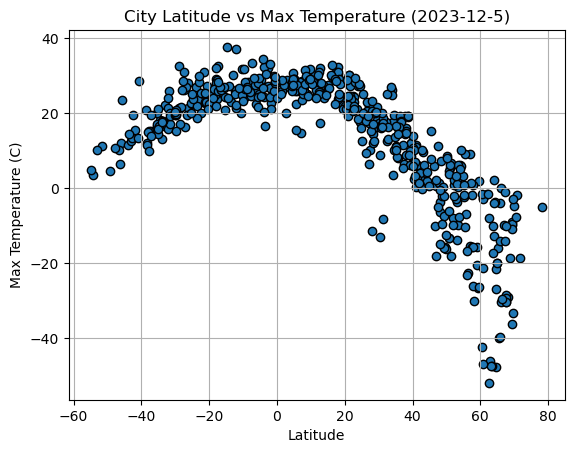

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs Max Temperature (2023-12-5)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

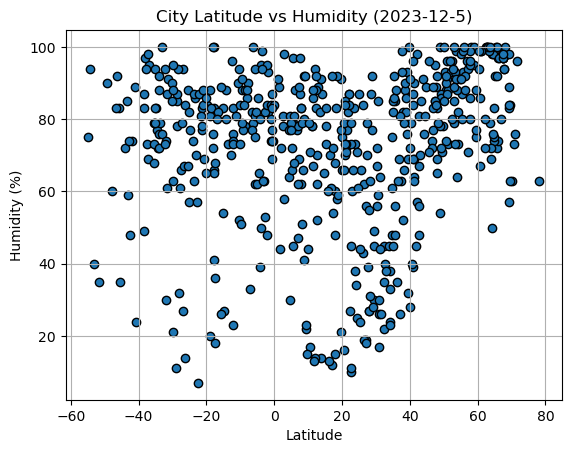

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (2023-12-5)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

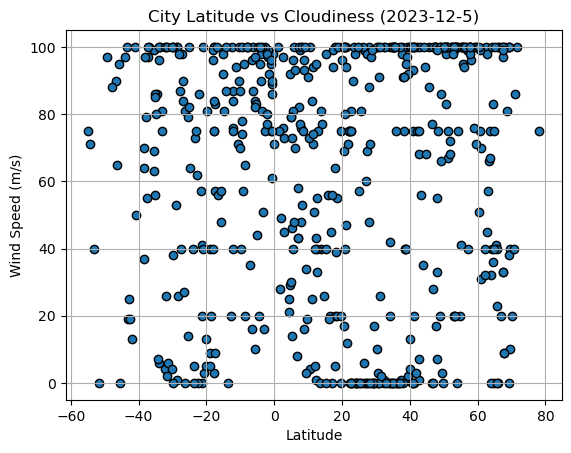

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Cloudiness (2023-12-5)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

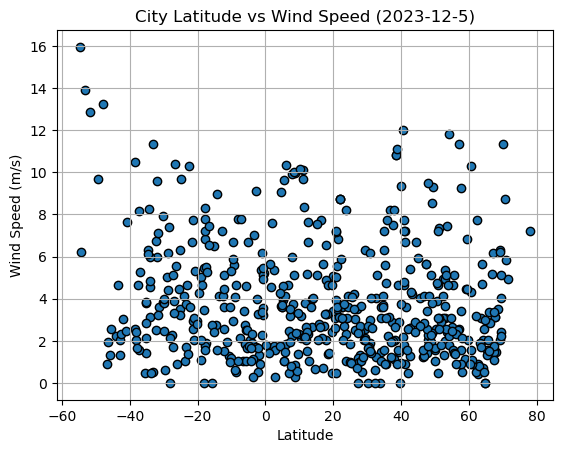

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed (2023-12-5)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel):
   
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

plot_linear_regression(city_data_df['Lat'], city_data_df['Wind Speed'], 'Latitude', 'Wind Speed')


In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,douglas,41.3000,-96.1670,6.02,64,0,7.20,US,1701798612
2,jamestown,42.0970,-79.2353,1.77,98,100,0.45,US,1701798757
6,tiksi,71.6872,128.8694,-18.68,96,100,4.92,RU,1701798813
8,corfu,39.6200,19.9197,11.88,100,100,0.00,GR,1701798813
12,ad dawadimi,24.5077,44.3924,17.64,25,0,4.14,SA,1701798814


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gympie,-26.1898,152.6650,21.36,84,81,0.90,AU,1701798670
3,adamstown,-25.0660,-130.1015,22.52,82,100,6.33,PN,1701798812
4,ancud,-41.8697,-73.8203,15.40,74,13,3.03,CL,1701798549
5,papao,-17.7500,-149.5500,27.82,81,100,8.31,PF,1701798812
7,soio,-6.1349,12.3689,26.23,79,87,2.77,AO,1701798813


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.74


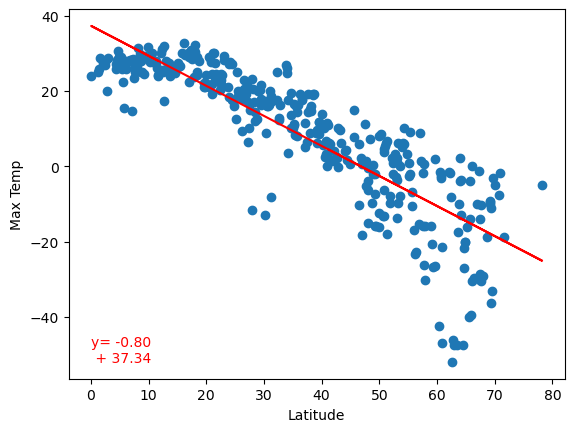

In [66]:
# Linear regression on Northern Hemisphere

def plot_linear_regression(x_values, y_values, xlabel, ylabel):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Scatter plot
    plt.scatter(x_values, y_values, marker='o', label='Data Points')

    # Plot the regression line
    plt.plot(x_values, regression_line, color='red', label='Linear Regression')

    # Adding labels and title
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')

    # Display the correlation coefficient in the legend
    print(f'The r-value is: {r_value**2:.2f}')
    plt.text(min(x_values), min(y_values), f'y= {slope:.2f}\n + {intercept:.2f}', color='red')

    # Show the plot
    plt.show()
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

The r-value is: 0.56


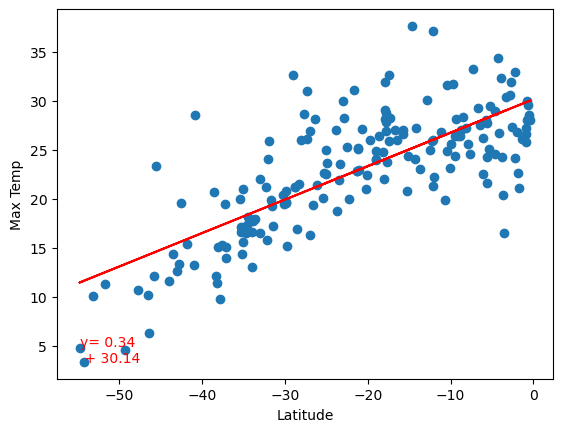

In [67]:
# Linear regression on Southern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Scatter plot
    plt.scatter(x_values, y_values, marker='o', label='Data Points')

    # Plot the regression line
    plt.plot(x_values, regression_line, color='red', label='Linear Regression')

    # Adding labels and title
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')

    # Display the correlation coefficient in the legend
    print(f'The r-value is: {r_value**2:.2f}')
    plt.text(min(x_values), min(y_values), f'y= {slope:.2f}\n + {intercept:.2f}', color='red')

#     plt.text(min(x_values), max(y_values), f'R-squared: {r_value**2:.2f}', color='red')

    # Show the plot
    plt.show()
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** We see a fairly strong correlation between Latitude and Max Temp with an R-Value of 0.74 in the Northern Hemisphere and 0.56 in the Southern Hemisphere. This shows the closer a latitude is to 0 (the Equator), the more likely they are to have a higher max temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.14


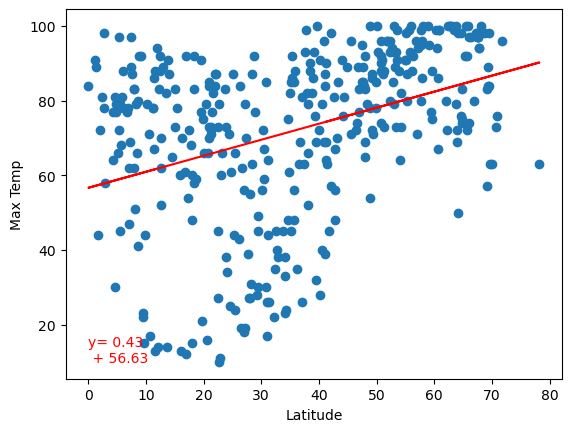

In [68]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Scatter plot
    plt.scatter(x_values, y_values, marker='o', label='Data Points')

    # Plot the regression line
    plt.plot(x_values, regression_line, color='red', label='Linear Regression')

    # Adding labels and title
    plt.xlabel('Latitude')
    plt.ylabel('Humidity')

    # Display the correlation coefficient in the legend
    print(f'The r-value is: {r_value**2:.2f}')
    plt.text(min(x_values), min(y_values), f'y= {slope:.2f}\n + {intercept:.2f}', color='red')

    # Show the plot
    plt.show()
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Max Temp')

The r-value is: 0.00


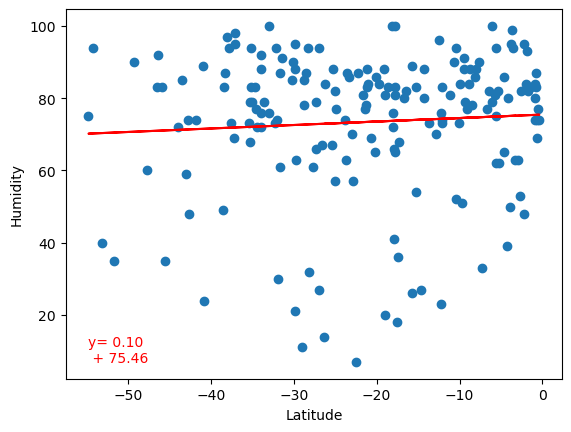

In [70]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Scatter plot
    plt.scatter(x_values, y_values, marker='o', label='Data Points')

    # Plot the regression line
    plt.plot(x_values, regression_line, color='red', label='Linear Regression')

    # Adding labels and title
    plt.xlabel('Latitude')
    plt.ylabel('Humidity')

    # Display the correlation coefficient in the legend
    print(f'The r-value is: {r_value**2:.2f}')
    plt.text(min(x_values), min(y_values), f'y= {slope:.2f}\n + {intercept:.2f}', color='red')

#     plt.text(min(x_values), max(y_values), f'R-squared: {r_value**2:.2f}', color='red')

    # Show the plot
    plt.show()
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** With a R-value of 0.14 for the Northern Hemisphere and 0.00 for the Southern Hemisphere, there is no significant correlation between Latitude and Humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02


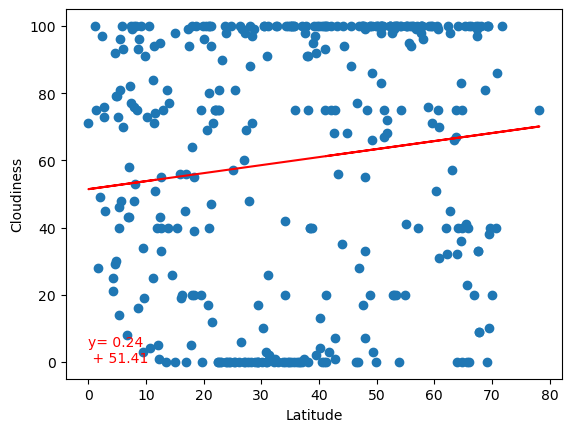

In [72]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Scatter plot
    plt.scatter(x_values, y_values, marker='o', label='Data Points')

    # Plot the regression line
    plt.plot(x_values, regression_line, color='red', label='Linear Regression')

    # Adding labels and title
    plt.xlabel('Latitude')
    plt.ylabel('Cloudiness')

    # Display the correlation coefficient in the legend
    print(f'The r-value is: {r_value**2:.2f}')
    plt.text(min(x_values), min(y_values), f'y= {slope:.2f}\n + {intercept:.2f}', color='red')

    # Show the plot
    plt.show()
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Max Temp')

The r-value is: 0.03


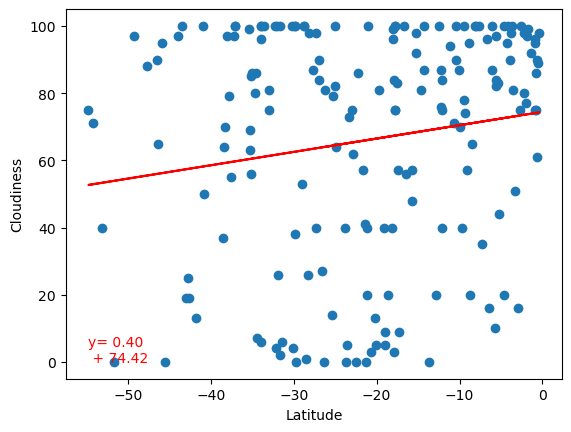

In [73]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Scatter plot
    plt.scatter(x_values, y_values, marker='o', label='Data Points')

    # Plot the regression line
    plt.plot(x_values, regression_line, color='red', label='Linear Regression')

    # Adding labels and title
    plt.xlabel('Latitude')
    plt.ylabel('Cloudiness')

    # Display the correlation coefficient in the legend
    print(f'The r-value is: {r_value**2:.2f}')
    plt.text(min(x_values), min(y_values), f'y= {slope:.2f}\n + {intercept:.2f}', color='red')

#     plt.text(min(x_values), max(y_values), f'R-squared: {r_value**2:.2f}', color='red')

    # Show the plot
    plt.show()
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** With a R-value of 0.02 for the Northern Hemisphere and 0.03 for the Southern Hemisphere, there is no significant correlation between Latitude and Cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00


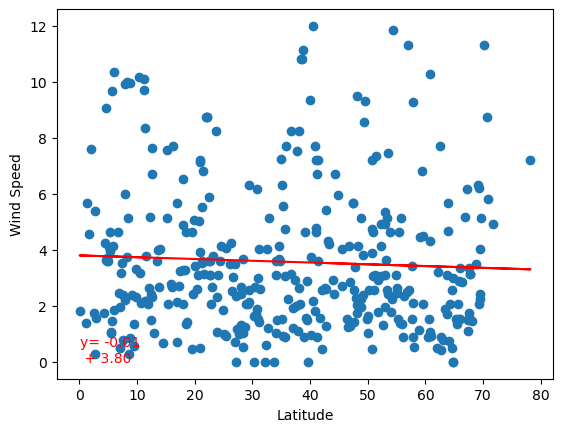

In [75]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Scatter plot
    plt.scatter(x_values, y_values, marker='o', label='Data Points')

    # Plot the regression line
    plt.plot(x_values, regression_line, color='red', label='Linear Regression')

    # Adding labels and title
    plt.xlabel('Latitude')
    plt.ylabel('Wind Speed')

    # Display the correlation coefficient in the legend
    print(f'The r-value is: {r_value**2:.2f}')
    plt.text(min(x_values), min(y_values), f'y= {slope:.2f}\n + {intercept:.2f}', color='red')

    # Show the plot
    plt.show()
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

The r-value is: 0.07


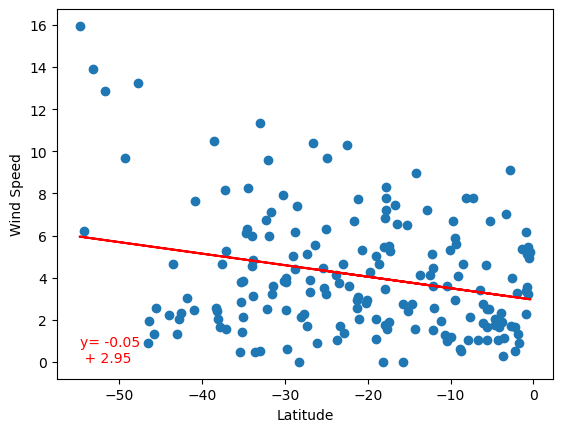

In [74]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, xlabel, ylabel):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Scatter plot
    plt.scatter(x_values, y_values, marker='o', label='Data Points')

    # Plot the regression line
    plt.plot(x_values, regression_line, color='red', label='Linear Regression')

    # Adding labels and title
    plt.xlabel('Latitude')
    plt.ylabel('Wind Speed')

    # Display the correlation coefficient in the legend
    print(f'The r-value is: {r_value**2:.2f}')
    plt.text(min(x_values), min(y_values), f'y= {slope:.2f}\n + {intercept:.2f}', color='red')

#     plt.text(min(x_values), max(y_values), f'R-squared: {r_value**2:.2f}', color='red')

    # Show the plot
    plt.show()
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** With a R-value of 0.00 for the Northern Hemisphere and 0.07 for the Southern Hemisphere, there is no significant correlation between Latitude and Wind Speed. 